Aprovecho de que la distribución de Poisson es discreta para armar la función de probabilidad acumulada (FPA). Corto en 3 sigmas porque me parece más que suficiente.

Una vez tengo la FPA discretizada la uso para, dado un número Y en (0,1), encontrar su correspondiente X. Ésto es el método de la función inversa sin tener la inversa en si.

In [5]:
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt
from math import factorial
# Estilo de gráficos
plt.style.use('dark_background')

In [6]:
plt.style.use('dark_background')

In [7]:
def Poisson(lambd, N):
    """ Devuelve una lista con elementos que siguen la distribución de Poisson
    
    Parameters
    ----------
    lambd : int
        Es la tasa de la distribución
    N : int
        Número de puntos, tiempo trancurrido
    
    Returns
    -------
    list
        Lista de valores "k" para una distribución de Poisson que siga los parámetros
    """
    import numpy as np
    from math import factorial
    # Creo la distribución acumulada de Poisson, la muestreo hasta un k igual a 3 sigma de
    # Poisson
    maxk = 3*lambd 
    Poisson = np.empty(maxk)
    for ij in range(maxk):
        Numerador = (lambd**(ij))*np.exp(-lambd)
        Poisson[ij] = Numerador/factorial(ij)
        ij = ij + 1
    Acum = np.cumsum(Poisson) # Distribución de probabilidad acumulada
    
    # Creo la distribución K que sigue la distribución de Poisson mediante "Acum"
    Nums = np.random.random(N) # Números aleatorios en [0,1]
    K = []
    ij = 0 # Recorre el arreglo Nums
    while ij<len(Nums):
        ik = 0 # Recorre el arreglo Acum
        while ik<maxk:
            if ik==0 and Nums[ij]<Acum[0]: # Caso cero
                K.append(ik)
            if ik>0 and Nums[ij]<Acum[ik] and Nums[ij]>Acum[ik-1]:
                K.append(ik)
            ik = ik + 1
        ij = ij + 1
    return K

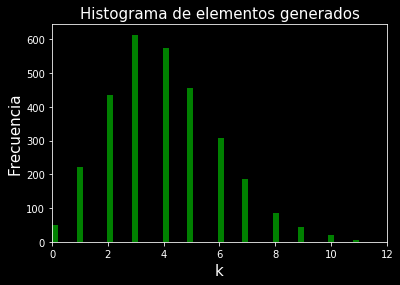

In [8]:
# Ejemplo
A = Poisson(lambd=4, N=3000)

plt.hist(A, color='green', bins=50)
plt.title('Histograma de elementos generados', fontsize=15)
plt.xlabel('k', fontsize=15)
plt.ylabel('Frecuencia', fontsize=15)
plt.xlim(0,12);